# basic math and statistics

## segment 1 : using NumPy to perform arithmetic operations

In [103]:
# import library
import numpy as np
from numpy.random import randn

In [104]:
# to print only 2 decimal
np.set_printoptions(precision=2)

### creating array

#### - using list

In [105]:
# array
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

#### - via assignment

In [106]:
# array of list
b = np.array([list(np.arange(4)), list(2 * np.arange(4)), list(3 * np.arange(4))])
b

array([[0, 1, 2, 3],
       [0, 2, 4, 6],
       [0, 3, 6, 9]])

In [107]:
# using random w/ seed
np.random.seed(25)
c = 10 * np.random.randn(6) # w/ randn, will get neg, nue, pos float value
c

array([ 2.28, 10.27, -8.4 , -5.91, -9.57, -2.22])

In [108]:
# using arrangement
d = np.arange(-2, 10)
d

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

### perform arithmetic on arrays

In [109]:
# array
a * 10

array([10, 20, 30, 40, 50, 60])

In [110]:
# arrays
c + a
# c + d # gives an error since different shape

array([ 3.28, 12.27, -5.4 , -1.91, -4.57,  3.78])

## segment 2 : multiplying metrices and basic linear algebra

In [111]:
# create arrays
aa = np.array([list(np.arange(3)), list(np.arange(3) / 10), list(3 * np.arange(3))])
aa

array([[0. , 1. , 2. ],
       [0. , 0.1, 0.2],
       [0. , 3. , 6. ]])

In [112]:
bb = np.array([list(np.arange(3) - 1), list(np.arange(1, 4)), list(np.arange(-5, -2))])
bb

array([[-1,  0,  1],
       [ 1,  2,  3],
       [-5, -4, -3]])

In [113]:
# a times b (not metrices multiplication)
aa * bb

array([[ -0. ,   0. ,   2. ],
       [  0. ,   0.2,   0.6],
       [ -0. , -12. , -18. ]])

In [114]:
# metric-a times metric-b (dot product)
np.dot(aa, bb)

array([[ -9. ,  -6. ,  -3. ],
       [ -0.9,  -0.6,  -0.3],
       [-27. , -18. ,  -9. ]])

### segment 3 : generating summary statistics using pandas and spicy

In [115]:
# import libraries
# pandas
import pandas as pd
from pandas import Series, DataFrame

# scipy
import scipy
from scipy import stats

In [116]:
# get data
# import library
import os

# get current working directory and data path
cwd = os.getcwd()
mtcar_path = cwd + '/linkedin-data/mtcars.csv'

# get data
cars = pd.read_csv(mtcar_path)

# rename unnamed column, there is one column in this case
cars.rename(columns={'Unnamed: 0': 'car_name'}, inplace=True)

# display data
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### getting stat info

#### variable's numeric values

In [117]:
cars.sum()

car_name    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                     642.9
cyl                                                       198
disp                                                   7383.1
hp                                                       4694
drat                                                   115.09
wt                                                    102.952
qsec                                                   571.16
vs                                                         14
am                                                         13
gear                                                      118
carb                                                       90
dtype: object

In [118]:
cars.sum(axis=1).head()
# summation of values row wise, instead of columns as above
# to put axis=1, will turn the aspect from default (=0), column wise into row wise

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/469679014.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.sum(axis=1).head()


0    328.980
1    329.795
2    259.580
3    426.135
4    590.310
dtype: float64

In [119]:
cars.median()

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/2356643283.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.median()


mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [120]:
cars.mean()

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/1764053374.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [121]:
cars.max() # will return max value of each column

car_name    Volvo 142E
mpg               33.9
cyl                  8
disp             472.0
hp                 335
drat              4.93
wt               5.424
qsec              22.9
vs                   1
am                   1
gear                 5
carb                 8
dtype: object

In [122]:
cars.mpg.idxmax() # get max id of 'mpg' field

19

#### variable distribution

In [123]:
# standard deviation
cars.std()

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/3416792708.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.std()


mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [124]:
# variance - also deviation but just for a dataset compared to mean
cars.var()

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/3530419848.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.var()


mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [125]:
# a profile of a field
cars.gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [126]:
# a profile of all fields
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## segment 4 : summarizing categorical data using pandas

In [127]:
# set 'car_name' as index for the dataset
cars.index = cars.car_name
cars

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_name,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [128]:
cars.carb.value_counts()

4    10
2    10
1     7
3     3
6     1
8     1
Name: carb, dtype: int64

In [129]:
car_category = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
car_category.head()

,cyl,vs,am,gear,carb
car_name,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [130]:
# groupby 'carb'
car_category.groupby('gear').describe()

cyl                                ... carb                    
     count      mean       std  min  25%  ...  min  25%  50%  75%  max
gear                                      ...                         
3     15.0  7.466667  1.187234  4.0  8.0  ...  1.0  2.0  3.0  4.0  4.0
4     12.0  4.666667  0.984732  4.0  4.0  ...  1.0  1.0  2.0  4.0  4.0
5      5.0  6.000000  2.000000  4.0  4.0  ...  2.0  2.0  4.0  6.0  8.0

[3 rows x 32 columns]

### transforming variables to categorical data type

In [131]:
# add new column 'group'
cars['group'] = pd.Series(cars.gear, dtype='category')
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [132]:
cars.group.value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### describing categorical data w/ crosstab

In [133]:
# frequency couunt, by default
pd.crosstab(cars.am, cars.group)

group,3,4,5
am,,,
0,15,4,0
1,0,8,5


## segment 5 : starting w/ parametric methods

In [134]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from scipy.stats.stats import pearsonr

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/685221044.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [135]:
%matplotlib inline
rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')

/var/folders/n5/0j73y4zd5gl31h2c1yl5c8y00000gp/T/ipykernel_4979/870439695.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### the Pearson Correlation

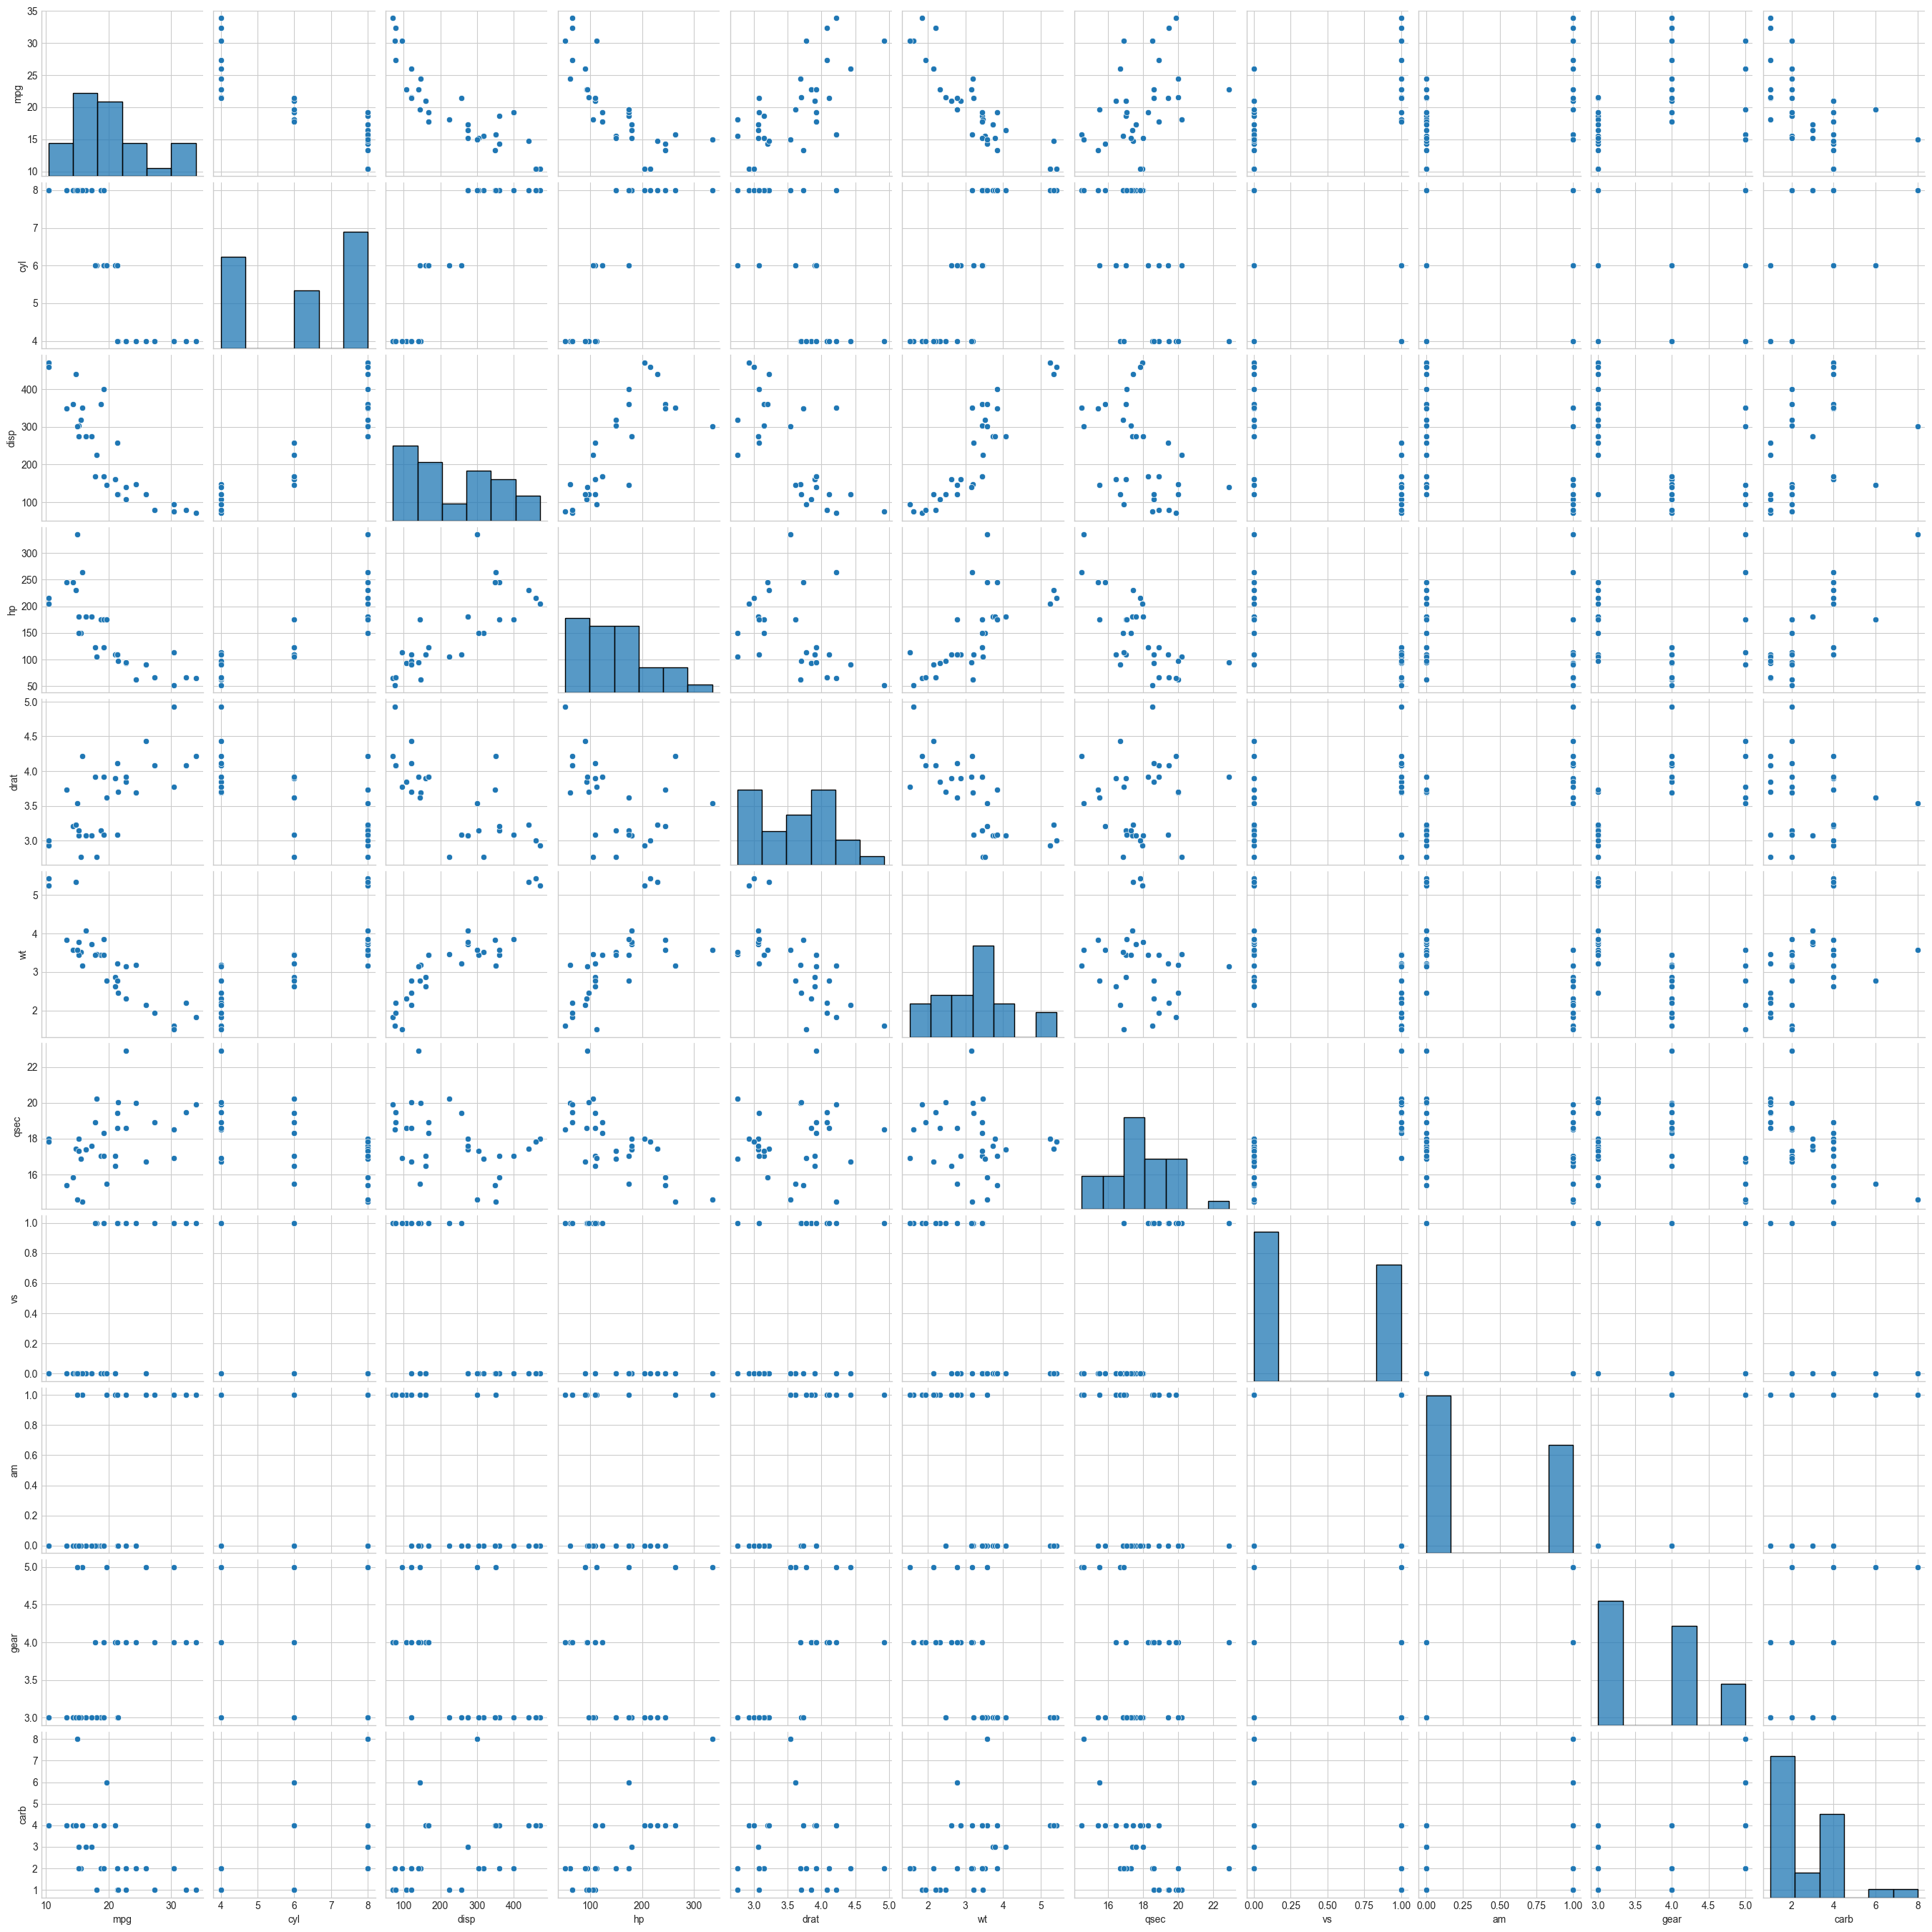

In [136]:
sb.pairplot(cars)

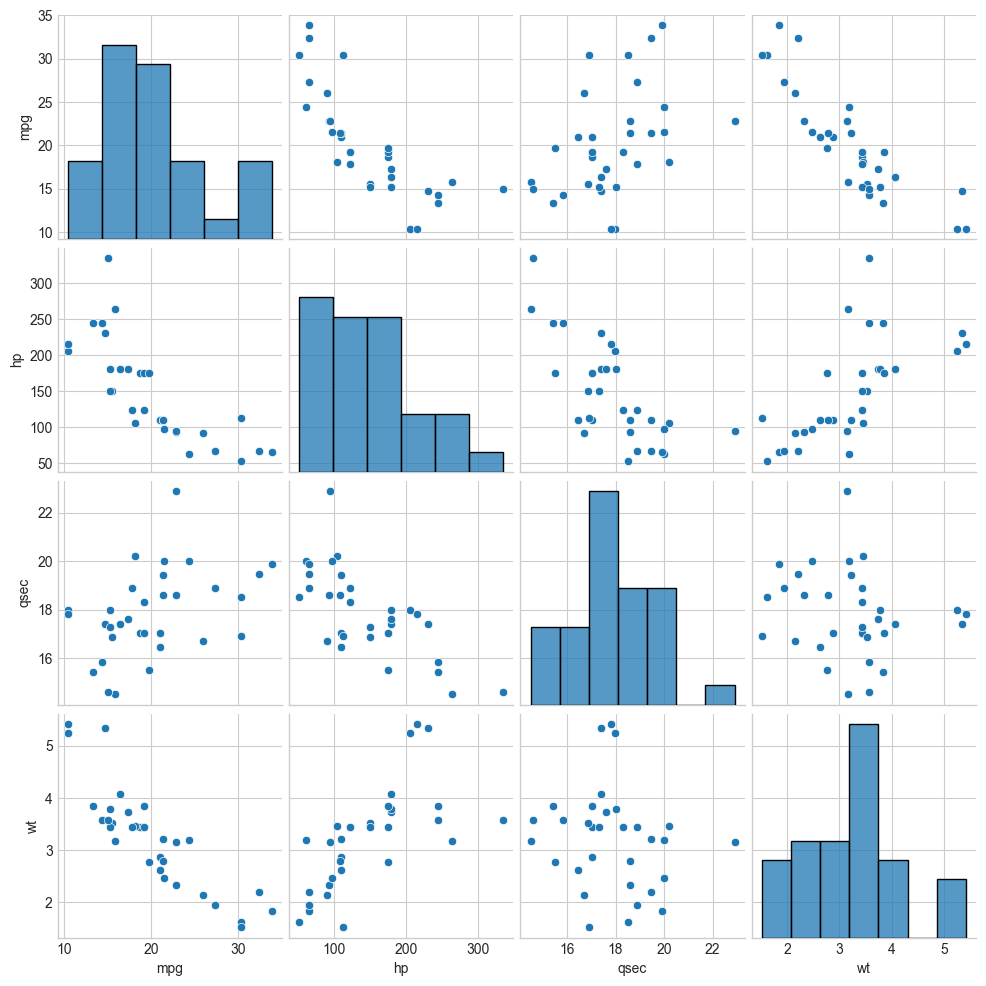

In [137]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

In [139]:
# declare variables
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

In [140]:
pearsonr_coeff, p_value = pearsonr(mpg, hp)
print('PearsonR Correlation Coefficient %.3f' % pearsonr_coeff) # negative correlation

PearsonR Correlation Coefficient -0.776


In [141]:
pearsonr_coeff, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %.3f' % pearsonr_coeff) # nearly positive correlation

PearsonR Correlation Coefficient 0.419


In [142]:
pearsonr_coeff, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %.3f' % pearsonr_coeff) # negative correlation

PearsonR Correlation Coefficient -0.868


In [144]:
# find correlation w/ pandas
cor = X.corr()
cor

<AxesSubplot: >

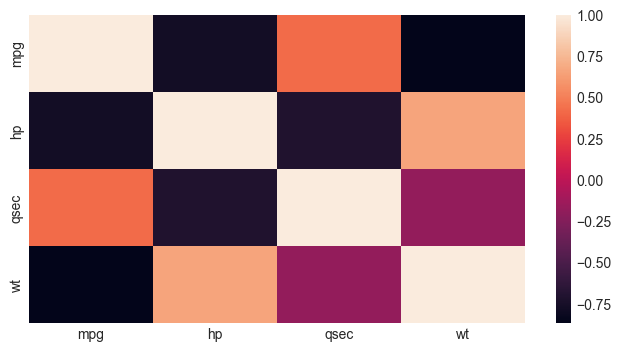

In [145]:
# visualize w/ seaborn
# pos = lighter, neg = darker
sb.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values)

## segment 6 : delving into non-parametric methods

In [149]:
# import library
from scipy.stats import spearmanr

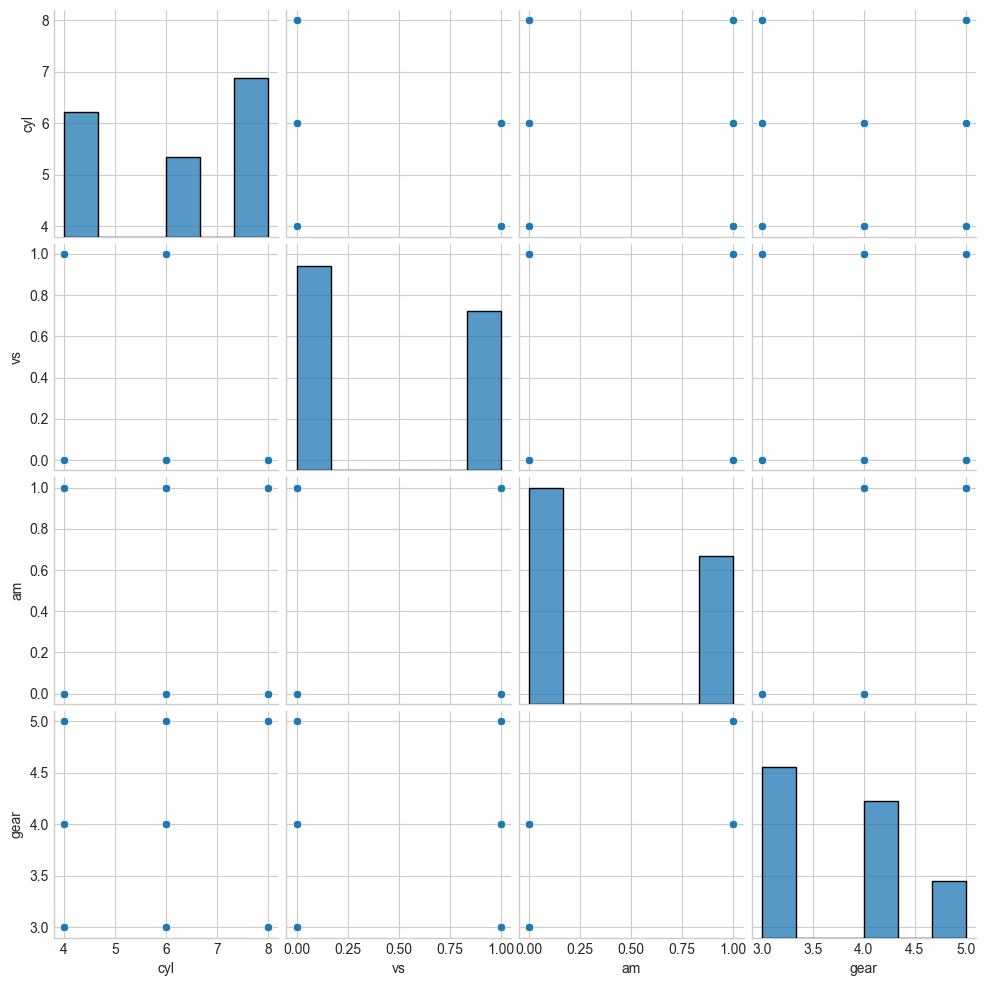

In [146]:
# prep variables
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

In [147]:
# declare variables
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

In [150]:
spearmanr_coeff, p_value = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient %.3f' % spearmanr_coeff)

Spearman Rank Correlation Coefficient -0.814


In [151]:
spearmanr_coeff, p_value = spearmanr(cyl, am)
print('Spearman Rank Correlation Coefficient %.3f' % spearmanr_coeff)

Spearman Rank Correlation Coefficient -0.522


In [152]:
spearmanr_coeff, p_value = spearmanr(cyl, gear)
print('Spearman Rank Correlation Coefficient %.3f' % spearmanr_coeff)

Spearman Rank Correlation Coefficient -0.564


### chi-sqaure test for independent

In [155]:
# import library
from scipy.stats import chi2_contingency

In [153]:
table = pd.crosstab(cyl, am)
table.values

array([[ 3,  8],
       [ 4,  3],
       [12,  2]])

In [159]:
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistics %.3f, p value %.3f ' % (chi2, p))

Chi-Square statistics 8.741, p value 0.013 


In [160]:
table = pd.crosstab(cyl, vs)
table.values

array([[ 1, 10],
       [ 3,  4],
       [14,  0]])

In [161]:
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistics %.3f, p value %.3f ' % (chi2, p))

Chi-Square statistics 21.340, p value 0.000 


In [162]:
table = pd.crosstab(cyl, gear)
table.values

array([[ 1,  8,  2],
       [ 2,  4,  1],
       [12,  0,  2]])

In [163]:
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-Square statistics %.3f, p value %.3f ' % (chi2, p))

Chi-Square statistics 18.036, p value 0.001 


In [ ]:
# they are all independent

## segment 7 : trasforming dataset distribution

In [166]:
# import library
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

rcParams['figure.figsize'] = 5, 4

### normalizing and transforming features

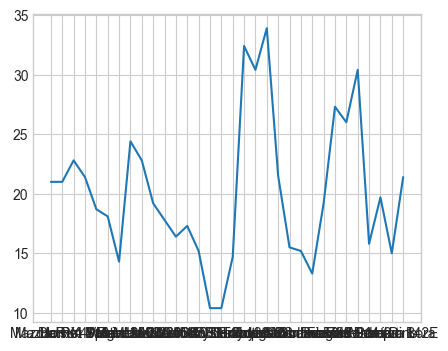

In [170]:
plt.plot(mpg)

In [171]:
mpg.describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

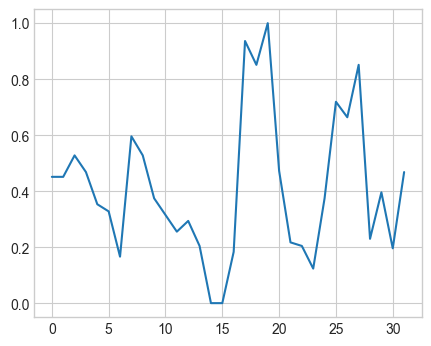

In [172]:
# to transform ranging -1 to 1
mpg_matrix = mpg.values.reshape(-1, 1)

# rescale from origin value to -1, 1
scaler = preprocessing.MinMaxScaler()
mpg_scaled = scaler.fit_transform(mpg_matrix)
plt.plot(mpg_scaled)

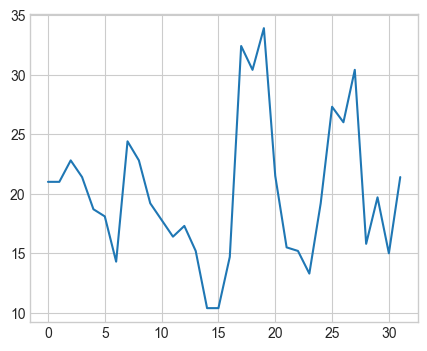

In [174]:
# using scale(), w/o mean and std
standardized_mpg = scale(mpg, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

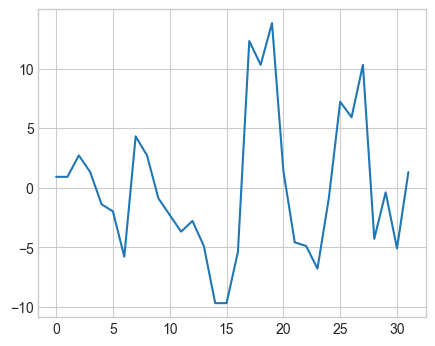

In [178]:
standardized_mpg = scale(mpg, with_std=False)
plt.plot(standardized_mpg)